# 1. Generate images set out of original lunar DEM tile (60 m/pix)
Initialize workspace: 

In [1]:
from PIL import Image
import time
Image.MAX_IMAGE_PIXELS = 353894500
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import input_data_gen as igen
import utils.processing as proc
import h5py
import utils.maplot
np.random.seed(42)

data_path='../data/'

In [2]:
# Read source image.
img = Image.open(data_path + "/sldem2015_512_00n_30n_000_045.jp2")
print(img.format, img.size, img.mode)
# [Min long, max long, min lat, max lat] dimensions of source image.
source_cdim = [0., 45., 0., 30.]

JPEG2000 (23040, 15360) I;16


153.47971105575562


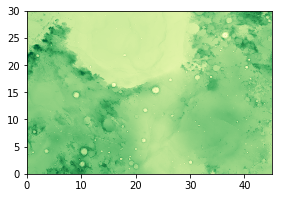

In [3]:
start_time = time.time()
fig = plt.figure(figsize=[6, 3])
dem_map = plt.imshow(img, extent=source_cdim, aspect="equal", cmap="YlGn")
elapsed_time = time.time() - start_time
print(elapsed_time)

Crop img to img_cr:

In [4]:
box = (0,1800,3600,3600)
ex_box = source_cdim*(np.array(box)/(img.size+img.size))[[0,2,1,3]]
img_cr=img.crop(box)
print(img_cr.format, img_cr.size, img_cr.mode)

None (3600, 1800) I;16


Conversion from 16-bit to 8-bit:

1.1318798065185547


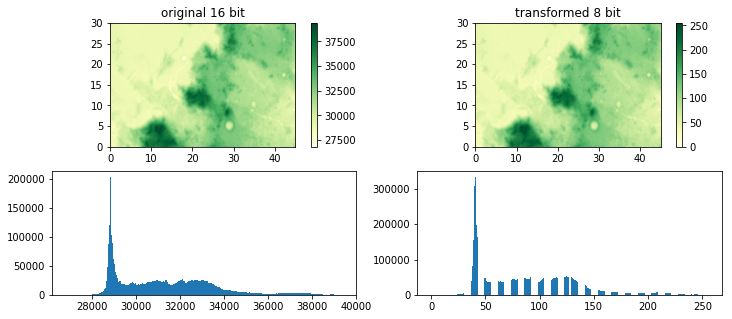

In [5]:
start_time = time.time()

img16=np.asarray(img_cr)
img16vec=np.concatenate(img16)

fig=plt.figure(figsize=(12,5))
#plot original image 16 bit+histogram:
plt.subplot(2,2,1)
plt.title('original 16 bit')
plt.imshow(img16, extent=source_cdim, aspect="equal", cmap="YlGn")
plt.colorbar()

plt.subplot(2,2,3)
plt.hist(img16vec, 256*2);


#transformation: 
min_val = np.min(img16vec)
dif = (np.max(img16vec)-min_val)
img8 = np.uint8((img16-min_val)/dif*256)

#plot transformed 8 bit+hist:
plt.subplot(2,2,2)
plt.title('transformed 8 bit')
plt.imshow(img8, extent=source_cdim, aspect="equal", cmap="YlGn")
plt.colorbar()

plt.subplot(2,2,4)
plt.hist(np.concatenate(img8), 256*2);

elapsed_time = time.time() - start_time
print(elapsed_time)